In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2024-05-25 13:49:52.722060: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-25 13:49:53.587452: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 13:49:55.182780: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Define paths

# data_dir = '../data/asl_alphabet_train/asl_alphabet_train'

data_dir = '/home/vmuser/2024/ACML/ASL_bigdata/asl_alphabet_train/asl_alphabet_train'

split_ratio = 0.8  # 80% training, 20% testing

datagen = ImageDataGenerator(validation_split=1 - split_ratio)

train_generator = datagen.flow_from_directory(
    data_dir,
    batch_size=128,
    class_mode='categorical',
    subset='training',
    shuffle = True
)

test_generator = datagen.flow_from_directory(
    data_dir,
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

Found 86999 images belonging to 29 classes.
Found 0 images belonging to 0 classes.


Displaying 2 images from class 'A':


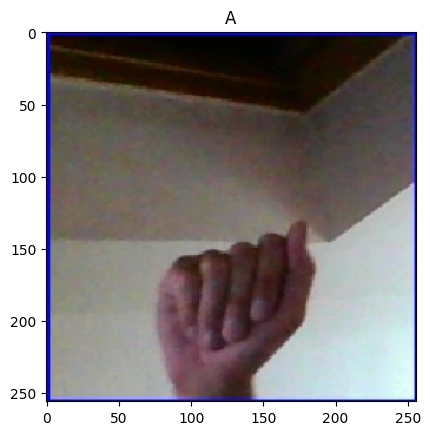

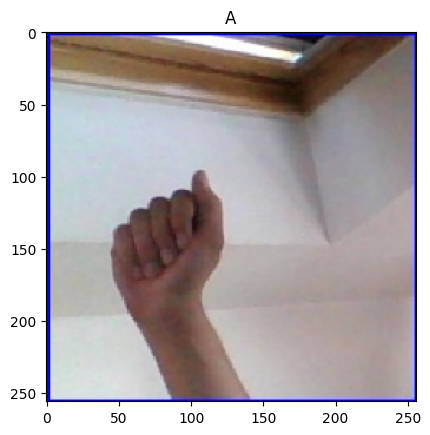

Displaying 2 images from class 'A':


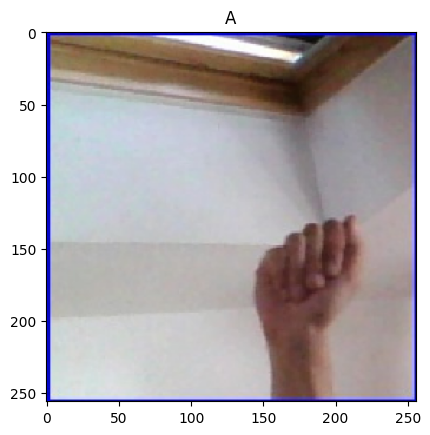

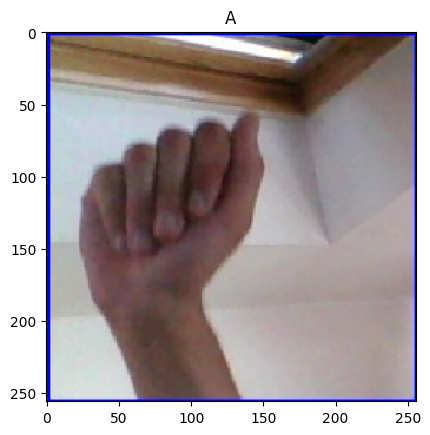

In [7]:
import matplotlib.pyplot as plt

def display_images(generator, class_name, num_images=2):
    class_index = generator.class_indices[class_name]
    class_dir = os.path.join(data_dir, class_name)
    
    images = os.listdir(class_dir)
    
    print(f"Displaying {num_images} images from class '{class_name}':")
    count = 0
    for batch, labels in generator:
        for img, label in zip(batch, labels):
            if label[class_index] == 1:
                plt.imshow(img.astype('uint8'))
                plt.title(f'{class_name}')
                plt.show()
                count += 1
                if count >= num_images:
                    return

display_images(train_generator, 'A')
display_images(test_generator, 'A')

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 flatten (

In [18]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
2176/2176 [==============================] - 2308s 1s/step - loss: 3.8282 - accuracy: 0.3869 - val_loss: 1.5674 - val_accuracy: 0.4333
Epoch 2/10
2176/2176 [==============================] - 2248s 1s/step - loss: 0.6094 - accuracy: 0.7901 - val_loss: 1.3796 - val_accuracy: 0.5246
Epoch 3/10
2176/2176 [==============================] - 2239s 1s/step - loss: 0.3881 - accuracy: 0.8666 - val_loss: 1.4211 - val_accuracy: 0.5371
Epoch 4/10
2176/2176 [==============================] - 2224s 1s/step - loss: 1.2562 - accuracy: 0.6197 - val_loss: 1.4913 - val_accuracy: 0.5058
Epoch 5/10
2176/2176 [==============================] - 2251s 1s/step - loss: 0.3198 - accuracy: 0.8891 - val_loss: 1.3597 - val_accuracy: 0.5935
Epoch 6/10
2176/2176 [==============================] - 2278s 1s/step - loss: 0.2312 - accuracy: 0.9235 - val_loss: 1.4520 - val_accuracy: 0.6357
Epoch 7/10
2176/2176 [==============================] - 2337s 1s/step - loss: 0.1776 - accuracy: 0.9434 - val_loss: 1.7427 -

543/543 [==============================] - 90s 165ms/step - loss: 1.7523 - accuracy: 0.6671
Validation Loss: 1.7523162364959717
Validation Accuracy: 0.6670888066291809


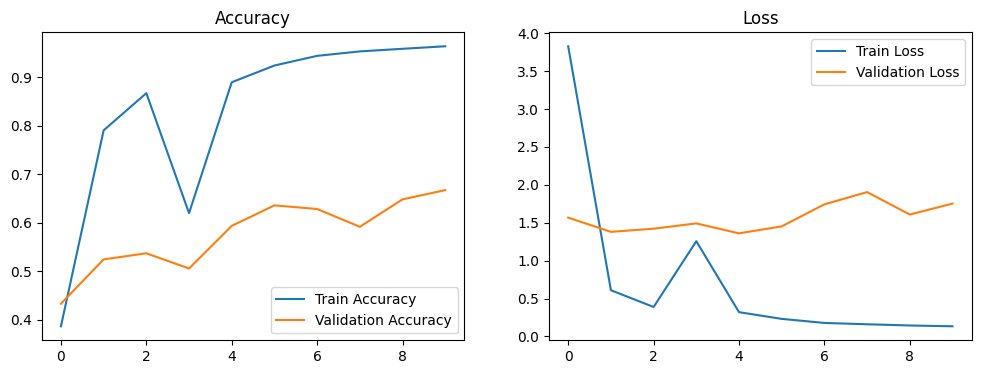

In [12]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(test_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plotting the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 234ms/step


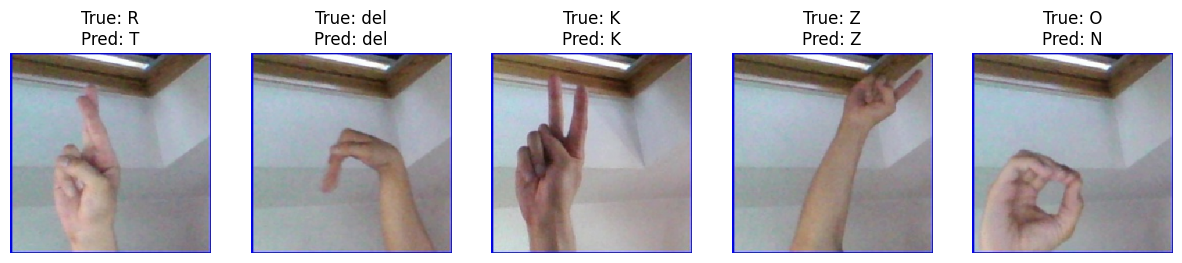

In [13]:
validation_images, validation_labels = next(test_generator)

# Make predictions on the validation images
predictions = model.predict(validation_images)

# Get the class indices
class_indices = {v: k for k, v in test_generator.class_indices.items()}

# Display a few validation images with their predicted labels
num_images_to_display = 5
plt.figure(figsize=(15, 10))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(validation_images[i].astype('uint8'))
    true_label = class_indices[np.argmax(validation_labels[i])]
    predicted_label = class_indices[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.show()

In [6]:
model_path = "checkpoints/model_98.h5"
model_autoenc.save(model_path)

c:\Users\Muhammad Sahal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import cv2
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from time import time

def load_data(train_dir):
    images = []
    labels = []
    index = -1
    for folder in os.listdir(data_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(data_dir)
print('Loading:', time() - start)

Loaded 69600 images for training, Train data shape = (69600, 32, 32, 3)
Loaded 17400 images for testing Test data shape = (17400, 32, 32, 3)
Loading: 69.28580784797668


In [5]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from time import time

def autoencoder_train(encoder, decoder, data, epochs, batch, learning_rate=0.0001):
    autoencoder = Sequential([encoder, decoder])
    adam = Adam(learning_rate=learning_rate)
    autoencoder.compile(optimizer=adam, loss='mse')
    start = time()
    autoencoder.fit(data, data, epochs=epochs, batch_size=batch, verbose = 2)
    train_time = time() - start

    return encoder, data, train_time

def CNN(x_train, y_train, x_test, y_test, epochs, batch, neurons, learning_rate=0.001):
    cur_data = x_train.copy() 
    encoder_1 = Sequential()
    encoder_1.add(Conv2D(32, (3, 3), activation='tanh', padding='same', input_shape=(32, 32,3)))
    encoder_1.add(MaxPooling2D(pool_size=(2, 2)))
    decoder_1 = Sequential([Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', input_shape=(16, 16, 32))])
    encoder_1, cur_data, cnn_ae_train_time = autoencoder_train(encoder_1, decoder_1, cur_data, epochs, batch)
    cur_data = encoder_1.predict(cur_data) 

    cur_data = cur_data.reshape(cur_data.shape[0], 8192)  
    encoder_2 = Sequential([Dense(512, activation='sigmoid')])
    decoder_2 = Sequential([Dense(8192, activation='sigmoid')])
    encoder_2, cur_data, fcnn_ae_train_time = autoencoder_train(encoder_2, decoder_2, cur_data, epochs, batch)
    
    model = Sequential([encoder_1, Flatten(), encoder_2]) 
    model.add(Dense(29, activation='softmax'))

    adam = Adam(lr=learning_rate) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    start = time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, shuffle = True)
    train_time = time() - start
    print('\nAutoencoder train_time: ', cnn_ae_train_time + fcnn_ae_train_time)
    print('\nCNN Train time: ', train_time)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('\nTest loss:', test_loss)
    print('\nCNN Test accuracy:', test_acc)

    return model, history
    
model_autoenc, history_enc = CNN(x_train, y_train, x_test, y_test, epochs = 5, batch = 128, neurons = 512)

Epoch 1/5
544/544 - 16s - loss: 0.0711 - 16s/epoch - 30ms/step
Epoch 2/5
544/544 - 27s - loss: 0.0116 - 27s/epoch - 49ms/step
Epoch 3/5
544/544 - 26s - loss: 0.0087 - 26s/epoch - 47ms/step
Epoch 4/5
544/544 - 27s - loss: 0.0070 - 27s/epoch - 49ms/step
Epoch 5/5
544/544 - 23s - loss: 0.0057 - 23s/epoch - 42ms/step
2175/2175 [==============================] - 15s 7ms/step
Epoch 1/5
544/544 - 34s - loss: 0.0826 - 34s/epoch - 63ms/step
Epoch 2/5
544/544 - 31s - loss: 0.0645 - 31s/epoch - 58ms/step
Epoch 3/5
544/544 - 32s - loss: 0.0640 - 32s/epoch - 58ms/step
Epoch 4/5
544/544 - 33s - loss: 0.0636 - 33s/epoch - 60ms/step
Epoch 5/5
544/544 - 33s - loss: 0.0632 - 33s/epoch - 60ms/step


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 16, 16, 32)        896       
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 sequential_3 (Sequential)   (None, 512)               4194816   
                                                                 
 dense_2 (Dense)             (None, 29)                14877     
                                                                 
Total params: 4210589 (16.06 MB)
Trainable params: 4210589 (16.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
490/490 [==============================] - 26s 52ms/step - loss: 1.9615 - accuracy: 0.4616 - val_loss: 1.0818 - val_accuracy: 0.7138
Epo

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from time import time
from torch.utils.data import TensorDataset, DataLoader


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train)
x_test_tensor = torch.tensor(x_test)
y_test_tensor = torch.tensor(y_test)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Example batch size
batch_size = 32

# Create data loaders for batching
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define the CNN Encoder
class CNNEncoder(nn.Module):
    def __init__(self):
        super(CNNEncoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.conv1(x))
        x = self.pool(x)
        return x

# Define the CNN Decoder
class CNNDecoder(nn.Module):
    def __init__(self):
        super(CNNDecoder, self).__init__()
        self.deconv = nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1)

    def forward(self, x):
        x = self.deconv(x)
        return x

# Define the FC Encoder
class FCEncoder(nn.Module):
    def __init__(self):
        super(FCEncoder, self).__init__()
        self.fc = nn.Linear(8192, 512)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.sigmoid(self.fc(x))
        return x

# Define the FC Decoder
class FCDecoder(nn.Module):
    def __init__(self):
        super(FCDecoder, self).__init__()
        self.fc = nn.Linear(512, 8192)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc(x))
        return x

# Define the Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define the CNN Autoencoder training function
def autoencoder_train(encoder, decoder, data, epochs, batch_size, learning_rate=0.0001):
    autoencoder = Autoencoder(encoder, decoder)
    autoencoder = autoencoder.to(device)
    optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    start = time()
    for epoch in range(epochs):
        for i in range(0, len(x_train), batch_size):
            batch = data[i:i + batch_size].permute(0,3,1,2).to(device)
            optimizer.zero_grad()
            outputs = autoencoder(batch)
            loss = criterion(outputs, batch)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs} loss: {loss.item():.4f}")

    train_time = time() - start
    return encoder, data, train_time

# Define the CNN function
def CNN(x_train, y_train, x_test, y_test, epochs, batch_size, neurons, learning_rate=0.001):
    cur_data = x_train.clone()

    encoder_1 = CNNEncoder().to(device)
    decoder_1 = CNNDecoder().to(device)
    encoder_1, cur_data, cnn_ae_train_time = autoencoder_train(encoder_1, decoder_1, cur_data, epochs, batch_size)

    cur_data = encoder_1(x_train.permute(0,3,1,2).to(device))
    cur_data = cur_data.view(cur_data.size(0), -1)

    encoder_2 = FCEncoder().to(device)
    decoder_2 = FCDecoder().to(device)
    encoder_2, cur_data, fcnn_ae_train_time = autoencoder_train(encoder_2, decoder_2, cur_data, epochs, batch_size)

    model = nn.Sequential(
        encoder_1,
        nn.Flatten(),
        encoder_2,
        nn.Linear(512, 29),
        nn.Softmax(dim=1)
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    start = time()
    for epoch in range(5):
        for i in range(0, len(x_train), batch_size):
            batch_x = x_train[i:i + batch_size].to(device).permute(0,3,1,2)
            batch_y = y_train[i:i + batch_size].to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs} loss: {loss.item():.4f}")

    train_time = time() - start

    print(f'\nAutoencoder train_time: {cnn_ae_train_time + fcnn_ae_train_time}')
    print(f'\nCNN Train time: {train_time}')

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for i in range(0, len(x_test), batch_size):
            batch_x = x_test[i:i + batch_size].to(device)
            batch_y = y_test[i:i + batch_size].to(device)
            outputs = model(batch_x)
            test_loss += criterion(outputs, batch_y).item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == batch_y).sum().item()

    test_loss /= len(x_test)
    test_acc = correct / len(x_test)

    print(f'\nTest loss: {test_loss}')
    print(f'\nCNN Test accuracy: {test_acc}')

    return model

# Assuming you have x_train, y_train, x_test, y_test as PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, epochs=5, batch_size=128, neurons=512)

Using device: cuda:0
Epoch 1/5 loss: 0.0158
Epoch 2/5 loss: 0.0099
Epoch 3/5 loss: 0.0072
Epoch 4/5 loss: 0.0057
Epoch 5/5 loss: 0.0048


RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from time import time
from torch.utils.data import TensorDataset, DataLoader


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train)
x_test_tensor = torch.tensor(x_test)
y_test_tensor = torch.tensor(y_test)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Example batch size
batch_size = 32

# Create data loaders for batching
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define the CNN Encoder
class CNNEncoder(nn.Module):
    def __init__(self):
        super(CNNEncoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.conv1(x))
        x = self.pool(x)
        return x

# Define the CNN Decoder
class CNNDecoder(nn.Module):
    def __init__(self):
        super(CNNDecoder, self).__init__()
        self.deconv = nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1)

    def forward(self, x):
        x = self.deconv(x)
        return x

# Define the FC Encoder
class FCEncoder(nn.Module):
    def __init__(self):
        super(FCEncoder, self).__init__()
        self.fc = nn.Linear(8192, 512)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.sigmoid(self.fc(x))
        return x

# Define the FC Decoder
class FCDecoder(nn.Module):
    def __init__(self):
        super(FCDecoder, self).__init__()
        self.fc = nn.Linear(512, 8192)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc(x))
        return x

# Define the Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define the CNN Autoencoder training function
def autoencoder_train(encoder, decoder, data, epochs, batch_size, learning_rate=0.0001):
    autoencoder = Autoencoder(encoder, decoder)
    autoencoder = autoencoder.to(device)
    optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    start = time()
    for epoch in range(epochs):
        for i in range(0, len(x_train), batch_size):
            batch = data[i:i + batch_size].permute(0,3,1,2).to(device)
            optimizer.zero_grad()
            outputs = autoencoder(batch)
            loss = criterion(outputs, batch)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs} loss: {loss.item():.4f}")

    train_time = time() - start
    return encoder, data, train_time

# Define the CNN function
def CNN(x_train, y_train, x_test, y_test, epochs, batch_size, neurons, learning_rate=0.001):
    cur_data = x_train.clone()

    encoder_1 = CNNEncoder().to(device)
    decoder_1 = CNNDecoder().to(device)
    encoder_1, cur_data, cnn_ae_train_time = autoencoder_train(encoder_1, decoder_1, cur_data, epochs, batch_size)

    cur_data = encoder_1(x_train.permute(0,3,1,2).to(device))
    cur_data = cur_data.view(cur_data.size(0), -1)

    encoder_2 = FCEncoder().to(device)
    decoder_2 = FCDecoder().to(device)
    encoder_2, cur_data, fcnn_ae_train_time = autoencoder_train(encoder_2, decoder_2, cur_data, epochs, batch_size)

    model = nn.Sequential(
        encoder_1,
        nn.Flatten(),
        encoder_2,
        nn.Linear(512, 29),
        nn.Softmax(dim=1)
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    start = time()
    for epoch in range(5):
        for i in range(0, len(x_train), batch_size):
            batch_x = x_train[i:i + batch_size].to(device).permute(0,3,1,2)
            batch_y = y_train[i:i + batch_size].to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs} loss: {loss.item():.4f}")

    train_time = time() - start

    print(f'\nAutoencoder train_time: {cnn_ae_train_time + fcnn_ae_train_time}')
    print(f'\nCNN Train time: {train_time}')

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for i in range(0, len(x_test), batch_size):
            batch_x = x_test[i:i + batch_size].to(device)
            batch_y = y_test[i:i + batch_size].to(device)
            outputs = model(batch_x)
            test_loss += criterion(outputs, batch_y).item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == batch_y).sum().item()

    test_loss /= len(x_test)
    test_acc = correct / len(x_test)

    print(f'\nTest loss: {test_loss}')
    print(f'\nCNN Test accuracy: {test_acc}')

    return model

# Assuming you have x_train, y_train, x_test, y_test as PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, epochs=5, batch_size=128, neurons=512)

Using device: cuda:0
Epoch 1/5 loss: 0.0158
Epoch 2/5 loss: 0.0099
Epoch 3/5 loss: 0.0072
Epoch 4/5 loss: 0.0057
Epoch 5/5 loss: 0.0048


RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [ ]:
import gc

gc.collect()

torch.cuda.empty_cache()

RuntimeError: CUDA error: an illegal memory access was encountered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
